<h2>Notes -- Image Processing with Python: Drawing Basic Shapes</h2>

<h3><a class="anchor" id="toc">Table of Contents</a></h3>

1. [Why Drawing?](#ImgDraw)<br>
2. [Creating an New Image](#ImgCreate)<br>
   [2.1 Using cv2 to Create and Show Images](#ImgCreateCV2)<br>
   [2.2 Using PIL to Create and Display Images](#ImgCreatePIL)<br>
3. [Drawing Basic Shapes on an Image](#ImgShapes)<br>
   [3.1 Using cv2 to Draw Basic Shapes](#ImgShapesCV2)<br>
   [3.1.1 Creating a Canvas/Image on which to Draw cv2 Shapes](#ImgCanvasCV2)<br>
   [3.1.2 Drawing Lines with cv2](#ImgLinesCV2)<br>
   [3.1.3 Drawing Rectangles with cv2](#ImgRectanglesCV2)<br>
   [3.1.4 Drawing Circles with cv2](#ImgCirclesCV2)<br>
   [3.1.5 Drawing Ellipses with cv2](#ImgEllipsesCV2)<br>
   [3.1.6 Drawing Polygons with cv2](#ImgPolygonsCV2)<br>
   [3.1.7 Drawing Shapes on an Existing Image with cv2](#ImgExistingShapesCV2)<br>
   [3.2 Using PIL to Draw Basic Shapes](#ImgShapesPIL)<br>
   [3.2.1 Creating a Canvas/Image on which to Draw PIL Shapes](#ImgCanvasPIL)<br>
   [3.2.2 Drawing Points with PIL](#ImgPointsPIL)<br>
   [3.2.3 Drawing Lines with PIL](#ImgLinesPIL)<br>
   [3.2.4 Drawing Rectangles and Rounded Rectangles with PIL](#ImgRectanglesPIL)<br>
   [3.2.5 Drawing Ellipses with PIL](#ImgEllipsesPIL)<br>
   [3.2.6 Drawing Arcs, Chords and Pie Slices with PIL](#ImgArcsPIL)<br>
   [3.2.7 Drawing Polygons and Regular Polygons with PIL](#ImgPolygonsPIL)<br>

In [1]:
# enable all interactive output to be 'printed'
# and disable scrolling so long output can be displayed w/o scroll bars

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
#Template for subdivision heading with anchor and return to TOC
#<a class="anchor" id="abbrev_subhead"></a>
#<h3>1. Subheading</h3>
#<a href='#toc'>Return to TOC</a>

In [4]:
#template for displaying/embedding external image in juypter notebook
#print("Figure X. Yyyy")
#from IPython.display import Image, display
#display(Image(filename='images/lion.png', embed=True))

<a class="anchor" id="ImgDraw"></a>
<h3>1. Drawing Objects</h3>
<a href='#toc'>Return to TOC</a>

Most image processing libraries provide capabilities for drawing basic shapes on an image.  These capabilities are often used to:

<ul>
    <li>create a new image</li>
    <li>highlight various objects or aspects in the image</li>
    <li>eliminate or modify various aspects of an image</li>
    <li>annotate an image</li>
</ul>

<a class="anchor" id="ImgCreate"></a>
<h3>2. Creating an New Image</h3>
<a href='#toc'>Return to TOC</a>

Before we can draw a shape on an image, we have to have an image to draw on. One way to do this is to start with an existing image. Another way is to create a new image from scratch. In this section we'll illustrate how to use both cv2 and PIL to accomplish this later task.

<a class="anchor" id="ImgCreateCV2"></a>
<h4>2.1 Using cv2 to Create and Show New Images</h4>
<a href='#toc'>Return to TOC</a>

One strategy for using cv2 to create a new image is to:
<ol>
    <li>Define a numpy array of (h,w,ch) zeros where h is the height, w is the width of the image, and ch is the number of color channels. If 'ch' is undefined, then the image will consist entirely of black pixels. The other choices are 3 and 4.</li>
    <li>Define the color channels. If there are 3 channels, then a tuple of size 3 will be used. For example, (150,50,200). If its 4, then it will be a tuple of size 4. For instance (255,0,255,100). The meaning of each of these tuples will depend on the color model being used.</li>
    <li>Encode the numpy array to a particular image format (either '.png' or '.jpg') using the method cv2.imencode.</li>
    <li>Once it has been encoded, we can convert it to an iPython image which can then be displayed.</li>
<ol>

 

In [5]:
import os
import numpy as np
import random as rnd
#from PIL import Image
import PIL
import cv2

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

import IPython.display #import Image, display

# height and width of sample images
h = 100
w = 200
half_h = int(h/2)
half_w = int(w/2)


def imshow(img): # ipython display function for cv2
    # uses 'cv2' imencode (image encode) to create a single-row array of bytes that encodes
    # an image with a specified format -- a string of either '.png' or '.jpg' 
    _,ret = cv2.imencode('.png', img)
    i = IPython.display.Image(data=ret)
    display(i)


Black Image using cv2 for Display
(100, 200)


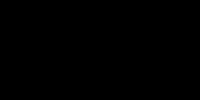

In [6]:
print("Black Image using cv2 for Display")
canvas_black_cv2 = np.zeros ((h,w), dtype = "uint8")
print(canvas_black_cv2.shape)
imshow(canvas_black_cv2)

Gray Image using cv2 for display
(100, 200)


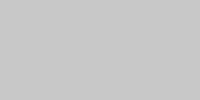

In [7]:
print("Gray Image using cv2 for display")
clr_gray = 200
canvas_gray_cv2 = np.zeros ((h,w), dtype = "uint8") + clr_gray
print(canvas_gray_cv2.shape)
imshow(canvas_gray_cv2)

Red Image using cv2 for display
(100, 200, 3)


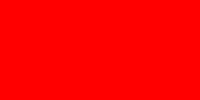

In [8]:
print("Red Image using cv2 for display")
canvas_red_cv2 = np.zeros ((h,w,3), dtype = "uint8")
clr = [0,0,255] # since this is cv2, the colors are BGR rather than RGB
canvas_red_cv2[:] = clr
print(canvas_red_cv2.shape)
imshow(canvas_red_cv2)

<a class="anchor" id="ImgCreatePIL"></a>
<h4>2.2 Using PIL to Create and Display New Images</h4>
<a href='#toc'>Return to TOC</a>

With the PIL library the process of creating and displaying a new image is really simple, especially if it's a single color. With a single color we can use PIL.Image.new. If it's multi-colored, then we first create a numpy array. Next we assign colors to each of the pixels in the array. Finally, we convert the array to an image using PIL.Image.fromarray.

<class 'PIL.Image.Image'>


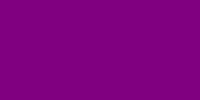

In [9]:
# images created with PIL take colors that are string values or tuples (r, g, b)
# note: in this case the pill image actually reverses x (cols) and y (rows)
# so instead of creating a '(h,w)' image you need to reverse these
# additionally it's RGB instead of BRG
# additionally it's not type numpy array

canvas_purple_PIL = PIL.Image.new("RGB", (w,h), "purple")
print(type(canvas_purple_PIL))
display(canvas_purple_PIL)


Checkerboard Image using PIL for display
(100, 200)
<class 'PIL.Image.Image'>


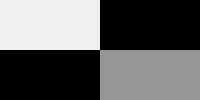

In [10]:
print("Checkerboard Image using PIL for display")
canvas_checkerboard = np.zeros ((h,w), dtype = "uint8")
canvas_checkerboard[0:half_h,0:half_w] = 240 #sets color to a shade of gray
canvas_checkerboard[half_h:h,half_w:w] = 150 #sets color to a shade of gray
print(canvas_checkerboard.shape)

img = PIL.Image.fromarray(canvas_checkerboard)
print(type(img))
display(img)


Image using PIL for display with a random color for every pixel
(100, 200, 3)


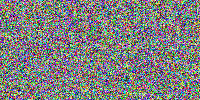

In [11]:
print("Image using PIL for display with a random color for every pixel")
canvas_rand_PIL = np.zeros ((h,w,3), dtype = "uint8")
for r in range(h):
    for c in range(w):
        colors = [rnd.randint(0,256),rnd.randint(0,256),rnd.randint(0,256)]
        canvas_rand_PIL[r,c] = colors
print(canvas_rand_PIL.shape)
im = PIL.Image.fromarray(canvas_rand_PIL)
display(im)

<a class="anchor" id="ImgShapes"></a>
<h3>3. Drawing Basic Shapes on an Image</h3>
<a href='#toc'>Return to TOC</a>

Both cv2 and PIL can be used to draw a relative small number of basic shapes on an image, existing or new. Among the shapes provided by the two libraries are:

<ul>
    <li>cv2 -- line, rectangle, circle, ellipse, polygon</li>
    <li>PIL -- point, line, rectangle, rounded_rectangle, polygon, regular_polygon circle, ellipse, arc, chord, pieslice</li>
<ul>

<a class="anchor" id="ImgShapesCV2"></a>
<h4>3.1 Using cv2 to Draw Basic Shapes</h4>
<a href='#toc'>Return to TOC</a>

cv2 supports the drawing of a handful of basic shapes including:
    
<ul>
    <li>cv2.line(img, start_coordinates, end_coordinates, color, thickness):
    <li>cv2.rectangle(img, start_coordinates, end_coordinates, color, thickness)</li>
    <li>cv2.circle(img, center, radius, color, thickness)</li>
    <li>cv2.ellipse(img, center, axes, angle, rotation_angle, start_angle, end_angle, color, thickness=1)</li>
    <li>cv2.polylines(img, array_coordinates, closed_flag, color, thickness)
</ul>

where

<ul>
    <li>img -- image on which shape(s) are drawn</li>
    <li>start_coordinates -- starting point tuple (for rectangle upper-left corner)</li>
    <li>end_coordinates -- ending point tuple (for rectangle lower-right corner)</li>
    <li>color - stroke color of shape in BGR</li>
    <li>thickness -- stroke thickness of shape (if = -1, then it fills the shape)</li>
    <li>center -- tuple defining center point of shape</li>
    <li>radius -- radius of circle</li>
    <li>rotation_angle -- rotation angle of the ellipse (calculated counterclockwise) -- determines the starting angle of the major/minor axes with respect to the center of the ellipse.</li>
    <li>start_angle -- starting angle (calculated clockwise) -- specifies rotation angle of the ellipse arc where the outline of the ellipse will start to be drawn.</li>
    <li>end_angle -- final angle (calculated clockwise) -- specifies the rotation angle of the ellipse arc where the outline of the ellipse will start to be drawn. </li>
    <li>array_coordinates -- np.array of coordinates defining polygon (i.e. [[y1,x1]...[yM,xN]])</li>
</ul>

Each of these shapes is illustrated below.

<a class="anchor" id="ImgCanvasCV2"></a>
<h5>3.1.1 Creating a Canvas/Image on which to Draw cv2 Shapes</h5>
<a href='#toc'>Return to TOC</a>

As a first step in the overall process, we've created a 200x400 numpy array of gray pixels to represent a canvas on which to draw the various shapes. We've labeled this array as 'canvas_gray_cv2'.  As before, the corners of this array are designated (clockwise) as:

<ul>
    <li>upper-left: canvas_gray_cv2[0,0]</li>
    <li>upper-right: canvas_gray_cv2[0,399]</li>
    <li>lower-left: canvas_gray_cv2[199,399]</li>
    <li>upper-left: canvas_gray_cv2[199,0]</li>
</ul>

Gray Canvas using cv2 for Display
(200, 400, 3)
height = 200
width = 400


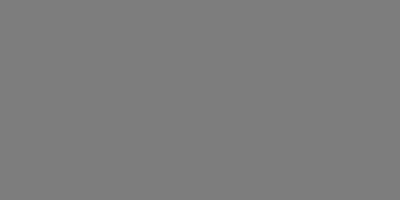

In [12]:
# numpy array to be used as the image canvas
# light shade of gray used so that canvas is easily seen

print("Gray Canvas using cv2 for Display")
colr_gray = (125,125,125)
canvas_gray_cv2 = np.zeros ((200,400,3), dtype = "uint8") + colr_gray
print(canvas_gray_cv2.shape)
print("height = {}".format(canvas_gray_cv2.shape[0]))
print("width = {}".format(canvas_gray_cv2.shape[1]))
imshow(canvas_gray_cv2)

<a class="anchor" id="ImgLinesCV2"></a>
<h5>3.1.2 Drawing Lines with cv2</h5>
<a href='#toc'>Return to TOC</a>

On the surface drawing a line in cv2 is straight forward. So, let's draw a line from the upper-left corner \[0,0\] to the lower-right corner \[199,399\].

Drawing cv2 line from corner to corner
<class 'numpy.ndarray'>


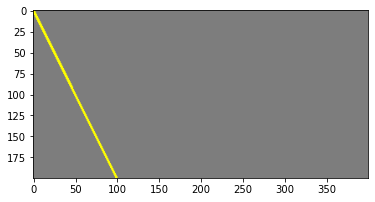

In [13]:

# cv2.line(img, start_coordinates, end_coordinates, color, thickness)

# parameters
img = canvas_gray_cv2.copy() # using a copy so we don't overwrite the canvas

start = (0,0) # this is the upper-left corner of the array
end = (199,399) # this is the lower-left corner of the array
colr = (255,255,0) #lightblue
thick = 2

# line
cv2.line(img, start, end, colr, thick)

# display
print("Drawing cv2 line from corner to corner")
print(type(img))
plt.imshow(img);

So, what's wrong with this picture? Couple of things.

First, as if the image coordinate system weren't confusing enough, cv2 shapes are drawn on an image where the pixels are designated as (x,y) tuples rather than the (y,x) tuples found in the images we've been working with. Thus, for instance, the corners in the world of cv2 shapes are designated: upper-left - (0,0), upper-right - (399,0), lower-right - (199,399), and lower-left - (0,199). 

Second, cv2 is happy to draw from one point to the next regardless of whether the point is on the screen or not. So, what cv2 did was draw to a theoretical end point of x = 199 and y = 399, even though a y = 399 does not exist (at least on the image we're looking at). The obvious, although perplexing, conclusion is that when we specifying a 'line', or any other cv2 shape for that matter, we use (x,y) coordinates where x is the number of columns and y is the number of rows where the origin (0,0) is still the upper-left corner. This is what is done below for all the remaining shapes.

Drawing cv2 lines from corner to corner


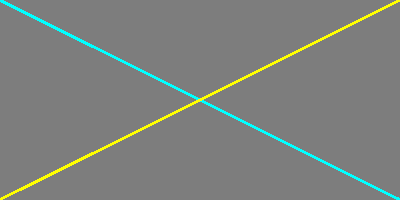

In [14]:
# cv2.line(img, start_coordinates, end_coordinates, color, thickness)
# with correct (x,y) coordinates

img = canvas_gray_cv2.copy() # using a copy so we don't overwrite the canvas

# parameters
start_1 = (0,0) # this is the upper-left corner of the array
end_1 = (399,199) # this is the lower-left corner of the array
start_2 = (399,0) # this is the upper-right corner of the array
end_2 = (0,199) # this is the lower-left corner of the array
lightblue = (255,255,0)
yellow = (0,255,255)
thick = 2

# diagonal from upper-left to lower-right
cv2.line(img, start_1, end_1, lightblue, thick)

# diagonal from upper-right to lower-left
cv2.line(img, start_2, end_2, yellow, thick)

# display
print("Drawing cv2 lines from corner to corner")
imshow(img);

<a class="anchor" id="ImgRectanglesCV2"></a>
<h5>3.1.3 Drawing Rectangles with cv2</h5>
<a href='#toc'>Return to TOC</a>

Drawing cv2 rectangle


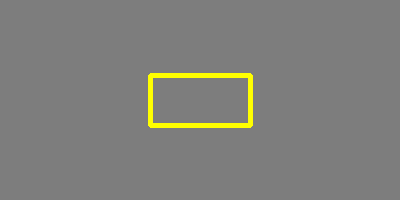

In [15]:
# drawing a cv2 rectangle (in center of the screen)
# cv2.rectangle(img, start_coordinates, end_coordinates, color, thickness)

# parameters
img = canvas_gray_cv2.copy() # using a copy so we don't overwrite the canvas

center = (int(400/2), int(200/2)) # center of 400x200 canvas
start = (center[0]-50, center[1]-25)
end = (center[0]+50, center[1]+25)
thick = 3

# display
print("Drawing cv2 rectangle")
cv2.rectangle(img, start, end, yellow, thick)
imshow(img);

<a class="anchor" id="ImgCirclesCV2"></a>
<h5>3.1.4 Drawing Circles with cv2</h5>
<a href='#toc'>Return to TOC</a>

Drawing cv2 circle of radius=75 in center of img
Note: When thickness = -1, it fills the shape


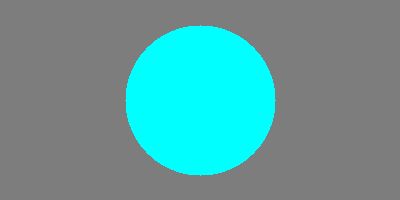

In [16]:
# drawing a cv2 circle (in center of the screen)
# cv2.circle(img, center, radius, color, thickness)

img = canvas_gray_cv2.copy() # using a copy so we don't overwrite the canvas

# parameters
center = (int(400/2), int(200/2)) # center of 400x200 canvas
radius = 75
thick = -1

# display
print("Drawing cv2 circle of radius=75 in center of img")
print("Note: When thickness = -1, it fills the shape")
cv2.circle(img, center, radius, lightblue, thick)
imshow(img);
    

<a class="anchor" id="ImgEllipsesCV2"></a>
<h5>3.1.5 Drawing Ellipses with cv2</h5>
<a href='#toc'>Return to TOC</a>

Drawing multiple cv2 ellipses


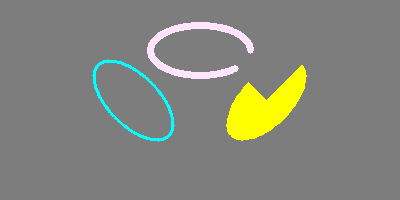

In [17]:
# drawing 3 cv2 ellipses
# cv2.ellipse(img, center, axes, rotation_angle, start_angle, end_angle, color, thickness)
# actually the cv2 definition of ellipse is more equivalent to other libraries defintions
# of an arc. 

img = canvas_gray_cv2.copy()

# parameters first ellipse
center_1 = (133,100)
axes_1 = (50,25)
rotation_angle_1 = 45
start_angle_1 = 0
end_angle_1 = 360
colr_1 = lightblue # defined earlier
thick_1 = 2

# parameters second ellipse
center_2 = (266,100)
axes_2 = (50,25)
rotation_angle_2 = -45
start_angle_2 = 0
end_angle_2 = 270
colr_2 = yellow # defined earlier
thick_2 = -1

# parameters third ellipse
center_3 = (200,50)
axes_3 = (50,25)
rotation_angle_3 = 0
start_angle_3 = 45
end_angle_3 = 360
colr_3 = (348, 229, 255) 
thick_3 = 6

# draw shapes

print("Drawing multiple cv2 ellipses")
cv2.ellipse(img, center_1, axes_1, rotation_angle_1, start_angle_1, end_angle_1, colr_1, thick_1)
cv2.ellipse(img, center_2, axes_2, rotation_angle_2, start_angle_2, end_angle_2, colr_2, thick_2)
cv2.ellipse(img, center_3, axes_3,  rotation_angle_3, start_angle_3, end_angle_3, colr_3, thick_3)
imshow(img);

<a class="anchor" id="ImgPolygonsCV2"></a>
<h5>3.1.6 Drawing Polygons (Polylines)  with cv2</h5>
<a href='#toc'>Return to TOC</a>

Drawing cv2 polygons with polylines


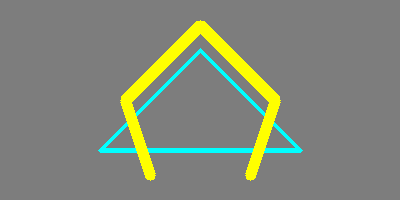

In [18]:
# drawing a cv2 polygon
# cv2.polylines(img, array_coordinates, closed_flag, color, thickness)
# the array coordinates define the points of the polygon and the order in which they will be drawn
# unlike the other shapes polylines does not support thickness = -1, so there is not direct way to 
# fill a polyline shape

img = canvas_gray_cv2.copy()

# parameters of first polygon
array_coordinates_1 = np.array([[200,50],[300,150],[100,150]], np.int32)
closed_flag_1 = True
colr_1 = lightblue
thickness_1 = 3

# parameters of second polygon
array_coordinates_2 = np.array([[150,175],[125,100],[200,25],[275,100],[250,175]], np.int32)
closed_flag_2 = False
colr_2 = yellow
thickness_2 = 10

print("Drawing cv2 polygons with polylines")
cv2.polylines(img, [array_coordinates_1], closed_flag_1, colr_1, thickness_1)
cv2.polylines(img, [array_coordinates_2], closed_flag_2, colr_2, thickness_2)
imshow(img);

<a class="anchor" id="ImgExistingShapesCV2"></a>
<h5>3.1.7 Drawing Shapes on an Existing Image with cv2</h5>
<a href='#toc'>Return to TOC</a>

Drawing shapes on an existing image is the same as drawing shapes on a newly defined image. Once it is read from a file with cv2.imread and assigned a variable name, it is converted to a numpy array that can be manipulated as if it were created from scratch. 

To illustrate this fact, let's use a couple of ellipses to highlight the head and face of the Lion.png file used in the previous notebook. First, we'll read the file and display it. Then, we'll use the ellipses for highlighting

Data type of Lion img created by cv2 <class 'numpy.ndarray'>
Shape of imgFile (175, 325, 3)


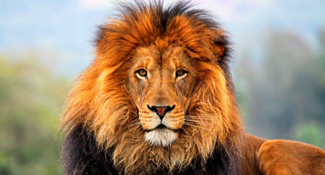

In [19]:
imgFile = os.getcwd() + '\images\lion.png'
img_cv2 = cv2.imread(imgFile)
print("Data type of Lion img created by cv2 {}".format(type(img_cv2)))
print("Shape of imgFile {}".format(img_cv2.shape))
imshow(img_cv2);

Drawing Shapes on an Existing Image


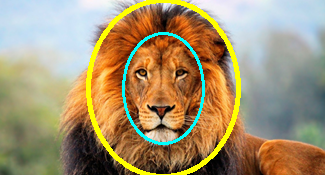

In [20]:
print("Drawing Shapes on an Existing Image")
img = img_cv2.copy()
cv2.ellipse(img, (163,88), (55,40), 90, 0, 360, lightblue, 2) #encompasses the inner face of the lion
cv2.ellipse(img, (163,88), (88,75), 90, 0, 360, yellow, 3) #enconpasses much of the outer head of the lion
imshow(img);

<a class="anchor" id="ImgShapesPIL"></a>
<h4>3.2 Using PIL to Draw Basic Shapes</h4>
<a href='#toc'>Return to TOC</a>

According to the <a href="https://pillow.readthedocs.io/en/stable/reference/ImageDraw.html">PIL reference</a>, the PIL 'ImageDraw' module "provides simple 2D graphics for Image objects. You can use this module to create new images, annotate or retouch existing images, and to generate graphics on the fly for web use."

On the surface it appears that the PIL.ImageDraw module supports a larger number of shapes than cv2. A closer look shows, however, that a number of PIL shapes are variants of each other including: arc, ellipse, chord, and pieslices; rectangle and rounded__rectangle; and polygon and regular_polygon. The meaning and general parameters of each shape type are shown below:
    
<ul>
    <li>PIL.ImageDraw.point(xy, fill=None) -- individual points at given coordinates.</li>
    <li>PIL.ImageDraw.line(xy, fill=None, width=0, joint=None) -- one or more lines between adjacent coordinates</li>
    <li>PIL.ImageDraw.rectangle(xy, fill=None, outline=None, width=1) - a rectangle defined by the upper-left and lower-right coordinates</li>
    <li>PIL.ImageDraw.rounded_rectangle(xy, radius, fill=None, outline=None, width=1) -- a rectangle with rounded corners where curve is determined by the radius (of the corners). </li>
    <li>PIL.ImageDraw.arc(xy, start, end, fill=None, width=0) -- outline of a partial ellipse.</li>
    <li>PIL.ImageDraw.chord(xy, start, end, fill=None, outline=None, width=1) -- same as an arc with endpoints connected by a straight line.</li>=None
    <li>PIL.ImageDraw.ellipse(xy, fill=None, outline=None, width=1) -- ellipse defined by bounded box.</li>
    <li>PIL.ImageDraw.pieslice(xy, start, end, fill=None, outline=None, width=1) -- same as arc with the end points connected by a straight line to the center of the 'pie'.</li>
    <li>PIL.ImageDraw.polygon(xy, fill=None, outline=None) -- straight lines between successive coordinates of the polygon and and a line between the first and last coordinates.</li>
    <li>PIL.ImageDraw.regular_polygon(bounded circle, n-sides, rotation=0, fill=None, outline=None) -- polygon inscribed in a bounded circle with n-sides and a rotation of specied degrees.</li>
</ul>

where

<ul>
    <li>xy -- array of ordered tuples or a list of ordered coordinates separated by commas or the upper-left and lower-right corners of a bounded box</li>
    <li>fill -- fill color, the default is None.</li>
    <li>outline -- color of the outer edge of the shape, the default is None.</li>
    <li>width -- stroke thickness of the outer edge of the shape, the default is 0 or 1.</li>
    <li>joint -- Joint type between a sequence of lines. It can be "curve", for rounded edges, or None (by default).</li>
    <li>radius -- distance from the center of the shape to the edge or the curvature of a corner.</li>
    <li>start -- starting angle in degrees with angle measured from 3 o’clock, increasing clockwise.</li>
    <li>end -- ending angle in degrees with angle measured from 3 o’clock, increasing clockwise../li
    <li>bounded circle -- a tuple defined by a point and radius. (e.g. bounding_circle is (x, y, r) or ((x, y), r)). The polygon is inscribed in this circle.</li>
    <li>n-sides -- number of sides of a polygon</li>
    <li>rotation -- arbitrary angle of rotation of a polygon
</ul>

Each of these shapes is illustrated below. Again, we'll start with a gray canvas only slightly lighter than the one used for cv2 shapes)

<a class="anchor" id="ImgCanvasPIL"></a>
<h5>3.2.1 Creating a Canvas/Image on which to Draw PIL Shapes</h5>
<a href='#toc'>Return to TOC</a>

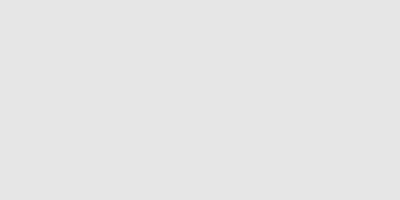

In [21]:
from PIL import ImageDraw

colr_gray = (230,230,230)
canvas_gray_PIL = PIL.Image.new('RGB', (400, 200), colr_gray)
draw = ImageDraw.Draw(canvas_gray_PIL)
display(canvas_gray_PIL);

<a class="anchor" id="ImgPointsPIL"></a>
<h5>3.2.2 Drawing Points with PIL</h5>
<a href='#toc'>Return to TOC</a>

Drawing points with PIL


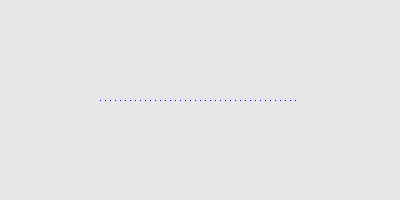

In [22]:
# PIL.ImageDraw.point(xy, fill=None)

canvas = canvas_gray_PIL.copy()
draw = ImageDraw.Draw(canvas)
for i in range(100,300,5):
    draw.point((i, 100), fill=(0,0,255))
print("Drawing points with PIL")
display(canvas);

<a class="anchor" id="ImgLinesPIL"></a>
<h5>3.2.3 Drawing Lines with PIL</h5>
<a href='#toc'>Return to TOC</a>

Drawing lines from corner to corner with PIL


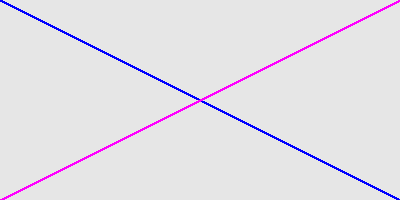

In [23]:
#PIL.ImageDraw.line(xy, fill=None, width=0, joint=None)

canvas = canvas_gray_PIL.copy()
draw = ImageDraw.Draw(canvas)
draw.line((0, 0, 400, 200), fill=(0,0,255), width=3)
draw.line((400, 0, 0, 200), fill=(255,0,255), width=3)
print("Drawing lines from corner to corner with PIL")
display(canvas);

<a class="anchor" id="ImgRectanglesPIL"></a>
<h5>3.2.4 Drawing a Rectangle and Rounded Rectangle with PIL</h5>
<a href='#toc'>Return to TOC</a>

Drawing a rectangle and rounded_rectangle with PIL


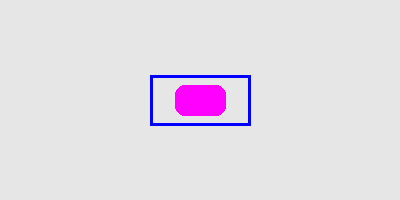

In [24]:
# PIL.ImageDraw.rectangle(xy, fill=None, outline=None, width=1) 
# PIL.ImageDraw._rounded_rectangle(xy, radius, fill=None, outline=None, width=1)

canvas = canvas_gray_PIL.copy()
draw = ImageDraw.Draw(canvas)
centerX = 200
centerY = 100
draw.rectangle((centerX-50,centerY-25,centerX+50,centerY+25), outline = (0,0,255), width=3)
draw.rounded_rectangle((centerX-25,centerY-15,centerX+25,centerY+15), radius=10, fill = (255,0,255), width=3)
print("Drawing a rectangle and rounded_rectangle with PIL")
display(canvas);

<a class="anchor" id="ImgEllipsesPIL"></a>
<h5>3.2.5 Drawing Ellipses with PIL</h5>
<a href='#toc'>Return to TOC</a>

Drawing ellipses with PIL


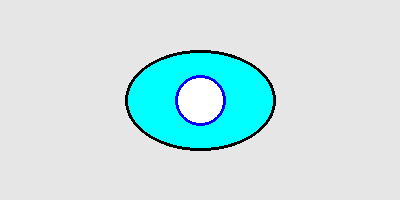

In [25]:
# PIL.ImageDraw.ellipse(xy, fill=None, outline=None, width=1)

canvas = canvas_gray_PIL.copy()
draw = ImageDraw.Draw(canvas)
centerX = 200
centerY = 100
draw.ellipse((centerX-75,centerY-50,centerX+75,centerY+50), fill = (0,255,255), outline = (0,0,0), width=3)
draw.ellipse((centerX-25,centerY-25,centerX+25,centerY+25), fill = (255,255,255), outline = (0,0,255), width=3)
print("Drawing ellipses with PIL")
display(canvas);

<a class="anchor" id="ImgArcsPIL"></a>
<h5>3.2.6 Drawing Arcs, Chords and Pie Slices with PIL</h5>
<a href='#toc'>Return to TOC</a>

Drawing an arc, chord, and pieslice with PIL


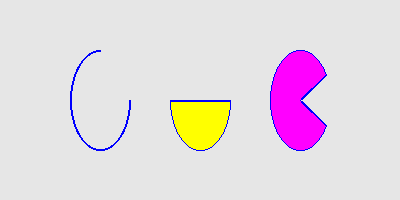

In [26]:
# PIL.ImageDraw.arc(xy, start, end, fill=None, width=0)
# PIL.ImageDraw.chord(xy, start, end, fill=None, outline=None, width=1)
# PIL.ImageDraw.pieslice(xy, start, end, fill=None, outline=None, width=1)

canvas = canvas_gray_PIL.copy()
draw = ImageDraw.Draw(canvas)
draw.arc((70,50,130,150), 0, 270, fill = (0,0,255), width=2)
draw.chord([(170,50),(230,150)], 0, 180, fill = (255,255,0), outline = (0,0,255), width=1)
draw.pieslice([(270,50),(330,150)], 30, 330, fill = (255,0,255), outline = (0,0,255), width=1)
print("Drawing an arc, chord, and pieslice with PIL")
display(canvas);

<a class="anchor" id="ImgPolygonsPIL"></a>
<h5>3.2.7 Drawing Polygons and Regular Polygons with PIL</h5>
<a href='#toc'>Return to TOC</a>

Drawing Polygons and Regular Polygons with PIL


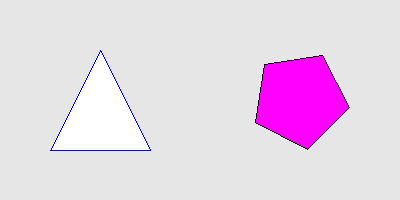

In [27]:
# PIL.ImageDraw.polygon(xy, fill=None, outline=None)
# PIL.ImageDraw.regular_polygon(bounded circle, n-sides, rotation=0, fill=None, outline=None)

canvas = canvas_gray_PIL.copy()
draw = ImageDraw.Draw(canvas)
draw.polygon([(100, 50), (150, 150), (50, 150)], fill=(255,255,255), outline = (0,0,255))
draw.regular_polygon((300,100,50), 5, rotation = 45, fill = (255,0,255), outline = (0,0,0))
print("Drawing Polygons and Regular Polygons with PIL")
display(canvas);

<a class="anchor" id="ImgExistingImagePIL"></a>
<h5>3.2.8 Drawing Shapes on an Existing Image with PIL</h5>
<a href='#toc'>Return to TOC</a>

Characteristics of Lion image:
Data type <class 'PIL.PngImagePlugin.PngImageFile'>
Image Format PNG
Color Model RGBA
Size: (325, 175)
Height: 175
Width: 325


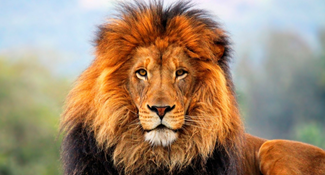

In [28]:
imgFile_PIL = os.getcwd() + '\images\lion.png'
img_PIL = PIL.Image.open(imgFile_PIL)

print("Characteristics of Lion image:")
print("Data type {}".format(type(img_PIL)))
print("Image Format", img_PIL.format)
print("Color Model {}".format(img_PIL.mode))
print("Size: {}".format(img_PIL.size))
print("Height: {}".format(img_PIL.height))
print("Width: {}".format(img_PIL.width))

display(img_PIL) # for some reason img_PIL won't 'show'

Drawing Shapes on an Existing Image


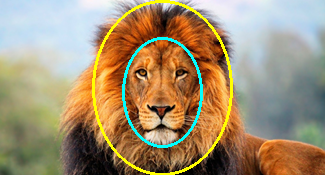

In [29]:
img = img_PIL.copy()
draw = ImageDraw.Draw(img)

print("Drawing Shapes on an Existing Image")
# first ellipse bounding box
x1 = img_PIL.width/2-40
y1 = img_PIL.height/2-50
x2 = img_PIL.width/2+40
y2 = img_PIL.height/2+60
draw.ellipse((x1,y1,x2,y2), outline = (0,255,255), width=3)

# second ellipse bounding box
x1 = img_PIL.width/2-70
y1 = 0
x2 = img_PIL.width/2+70
y2 = img_PIL.height
draw.ellipse((x1,y1,x2,y2), outline = (255,255,0), width=3)

display(img);